In [1]:
import torch
from dem.energies.gmm_pseudoenergy import GMMPseudoEnergy

In [2]:
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 100
# mpl.rcParams['figure.figsize'] = [10, 10]

In [7]:
import hydra
from omegaconf import DictConfig
from hydra.core.global_hydra import GlobalHydra

# Only initialize if not already initialized
if not GlobalHydra().is_initialized():
    # Initialize hydra with the same config path as train.py
    hydra.initialize(config_path="../../configs", version_base="1.3")
    # Load the experiment config for GMM with pseudo-energy
    cfg = hydra.compose(
        config_name="train",
        overrides=["experiment=gmm_idem_pseudo", "energy.hessian_weight=0.0"],
    )

# Instantiate the energy function using hydra, similar to train.py
energy_function = hydra.utils.instantiate(cfg.energy)

In [4]:
device = energy_function.device
energy_function..gmm.to(energy_function.device)
neg_U = lambda x: energy_function.physical_potential_log_prob(torch.tensor(x, device=device))

neg_U([0.0, 0.0])

tensor(-23.3163, device='cuda:0')

# Pseudopotential

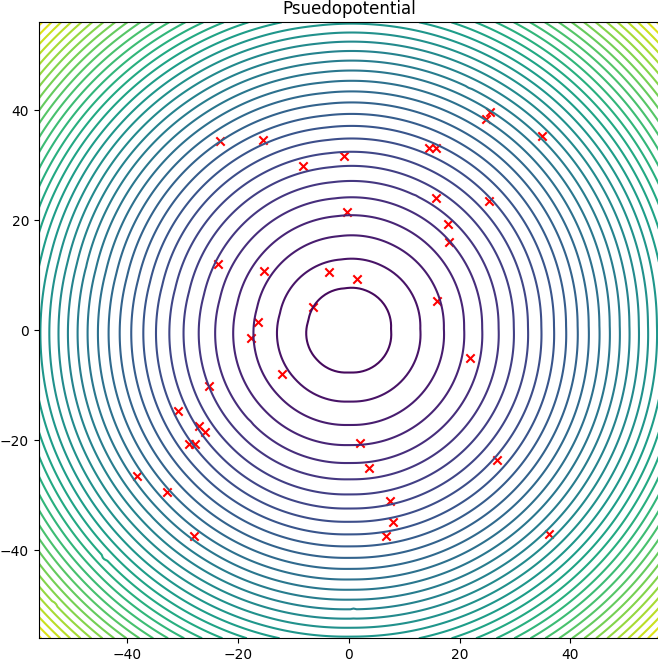

In [5]:
energy_function.get_single_dataset_fig(
    # samples=scipy_saddle_points,
    samples=None,
    name="Psuedopotential",
    plot_minima=True,
)

# Potential

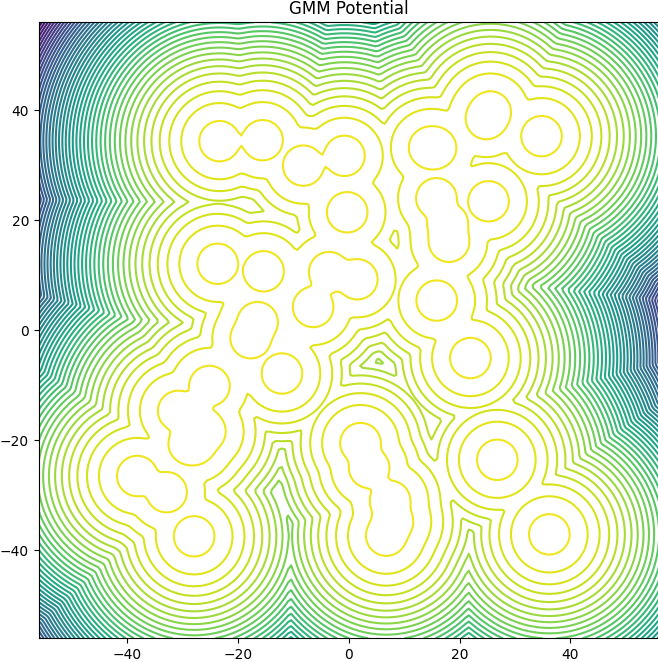

In [19]:
# img = energy_function.gmm_potential.get_dataset_fig(samples=None)
energy_function.gmm_potential.get_single_dataset_fig(samples=None, name="GMM Potential")

In [7]:
print(f"logprob energy at (0,0)", neg_U([0, 0]))
print(f"logprob energy at (0,30)", neg_U([0, 20]))
print(f"logprob energy at (0,43)", neg_U([0, 43]))

# energy_function.gmm_potential.get_single_dataset_fig(
#     samples=torch.tensor([[0,40.0]]), name="GMM Potential"
# )

energy at (0,0) tensor(-23.3163, device='cuda:0')
energy at (0,30) tensor(-267510.1875, device='cuda:0')
energy at (0,40) tensor(-1291204., device='cuda:0')


In [21]:
energy_function.get_transition_states(abs_ev_tol=1e-6, grad_tol=1e0)

Found 153 transition states


In [22]:
# energy_function.gmm_potential.get_single_dataset_fig(
#     samples=energy_function.boundary_points,
#     name="GMM Boundary Points",
#     plot_minima=True,
# )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [ ]:
# energy_function.gmm_potential.get_single_dataset_fig(
#     samples=energy_function.transition_points,
#     name="Boundary points with low grad norm and one negative Hessian eigenvalue",
#     plot_minima=True,
# )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [24]:
scipy_saddle_points = energy_function.get_true_transition_states()

100%|██████████| 1741/1741 [00:24<00:00, 70.50it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


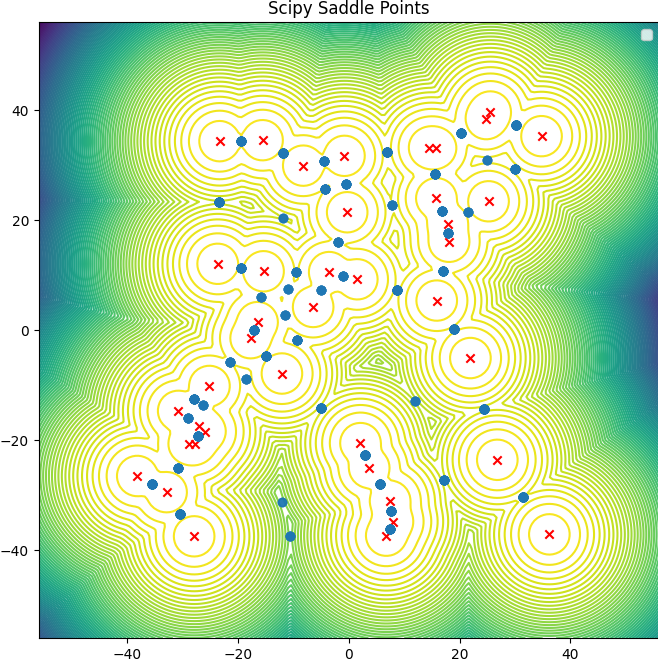

In [ ]:
energy_function.gmm_potential.get_single_dataset_fig(
    samples=scipy_saddle_points,
    name="Scipy Saddle Points",
    n_contour_levels=100,
    plot_minima=True,
)